# Task-1:-  Blob detection and Image Quality Enhancement.

## Blob Detection


Processing platelets.jpg


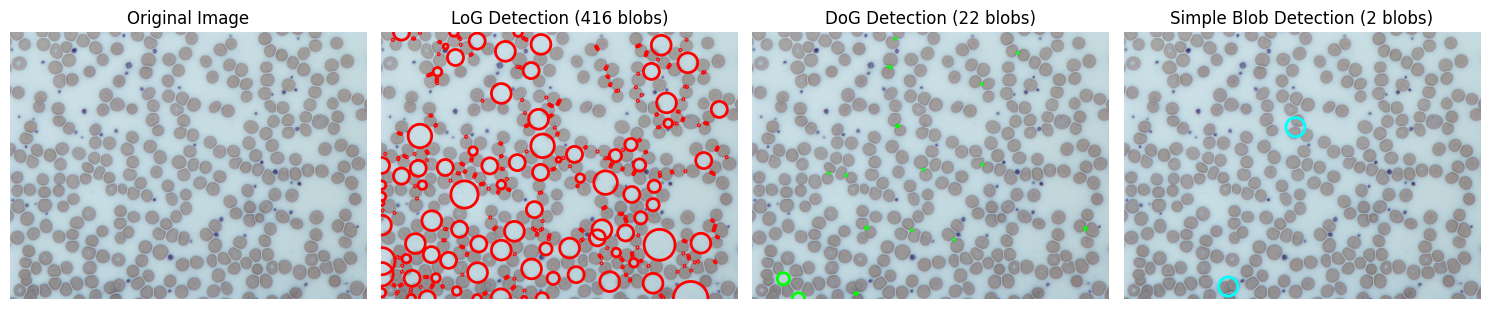

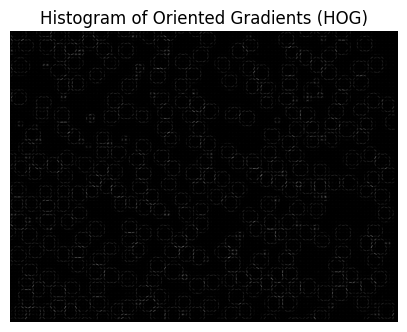

Number of blobs (LoG): 416
Number of blobs (DoG): 22
Number of blobs (Simple Blob Detector): 2

Processing candy.jpg


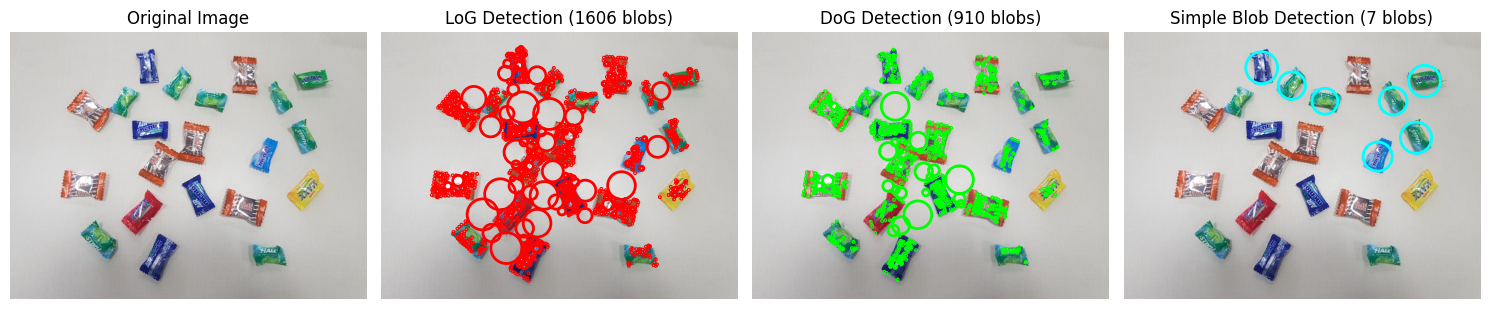

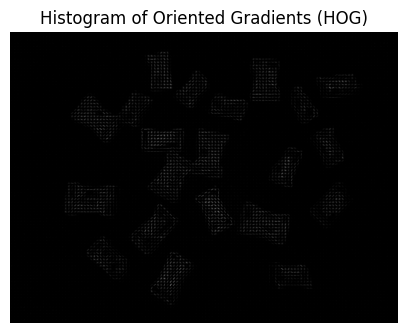

Number of blobs (LoG): 1606
Number of blobs (DoG): 910
Number of blobs (Simple Blob Detector): 7

Processing satellite1.png


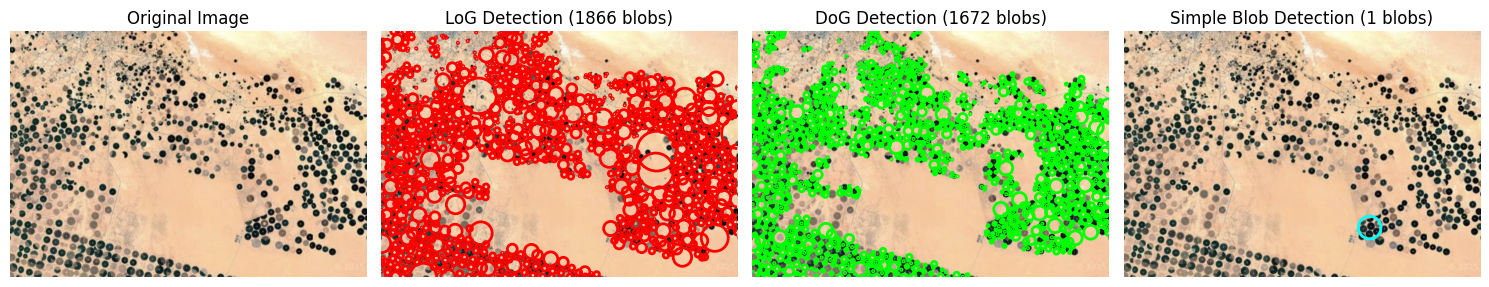

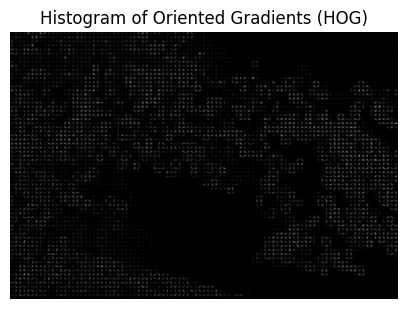

Number of blobs (LoG): 1866
Number of blobs (DoG): 1672
Number of blobs (Simple Blob Detector): 1

Processing satellite2.png


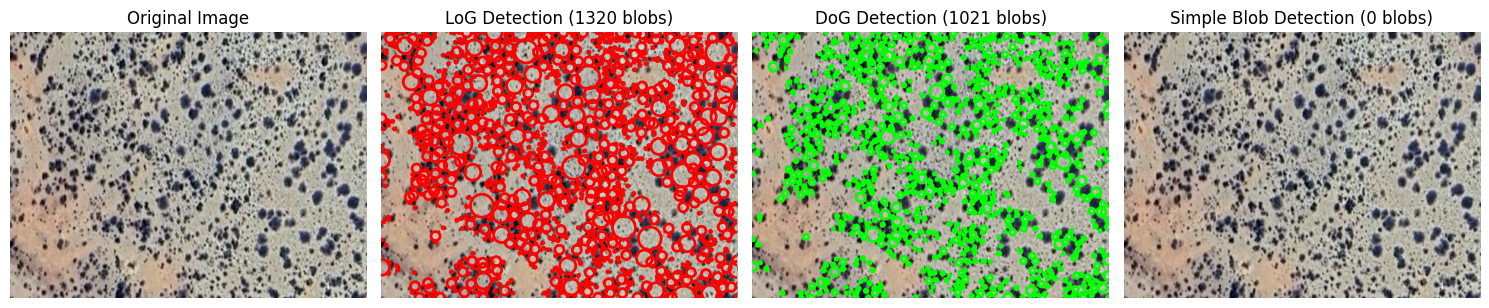

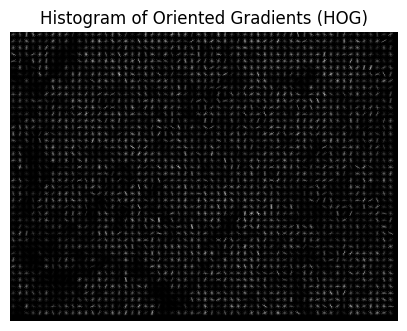

Number of blobs (LoG): 1320
Number of blobs (DoG): 1021
Number of blobs (Simple Blob Detector): 0


In [ ]:
import cv2
import numpy as np
from skimage.feature import blob_log, blob_dog, hog
import matplotlib.pyplot as plt

class BlobDetector:
    def __init__(self, image_path):
        """Initialize with image path and load the image."""
        self.image_path = image_path
        try:
            self.original_image = cv2.imread(self.image_path, cv2.IMREAD_COLOR)
            if self.original_image is None:
                raise FileNotFoundError(f"Could not load image at {self.image_path}")
            self.gray_image = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2GRAY)
        except Exception as e:
            print(f"Error loading image: {e}")
            raise

    def detect_blobs_log(self, min_sigma=1, max_sigma=30, num_sigma=10, threshold=0.1):
        """Detect blobs using Laplacian of Gaussian (LoG)."""
        blobs = blob_log(self.gray_image, min_sigma=min_sigma, max_sigma=max_sigma,
                         num_sigma=num_sigma, threshold=threshold)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Scale radii for visualization
        return blobs

    def detect_blobs_dog(self, min_sigma=1, max_sigma=30, threshold=0.1):
        """Detect blobs using Difference of Gaussian (DoG)."""
        blobs = blob_dog(self.gray_image, min_sigma=min_sigma, max_sigma=max_sigma,
                         threshold=threshold)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Scale radii for visualization
        return blobs

    def detect_hog_features(self, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2)):
        """Detect features using Histogram of Oriented Gradients (HOG)."""
        features, hog_image = hog(self.gray_image, orientations=orientations,
                                 pixels_per_cell=pixels_per_cell,
                                 cells_per_block=cells_per_block,
                                 visualize=True)
        return features, hog_image

    def detect_blobs_simple(self, min_threshold=10, max_threshold=200,
                           min_area=1500, min_convexity=0.87, min_inertia=0.01):
        """Detect blobs using OpenCV SimpleBlobDetector."""
        params = cv2.SimpleBlobDetector_Params()
        params.minThreshold = min_threshold
        params.maxThreshold = max_threshold
        params.filterByArea = True
        params.minArea = min_area
        params.filterByConvexity = True
        params.minConvexity = min_convexity
        params.filterByInertia = True
        params.minInertiaRatio = min_inertia

        ver = (cv2.__version__).split('.')
        if int(ver[0]) < 3:
            detector = cv2.SimpleBlobDetector(params)
        else:
            detector = cv2.SimpleBlobDetector_create(params)

        keypoints = detector.detect(self.gray_image)
        blobs = np.array([[kp.pt[1], kp.pt[0], kp.size / 2] for kp in keypoints])
        return blobs

    def visualize_all_results(self, blobs_log, blobs_dog, blobs_simple, hog_image):
        """Visualize all detection results in a single figure with subplots."""
        plt.figure(figsize=(15, 12))

        # Original Image
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # LoG Detection
        plt.subplot(1,4, 2)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_log:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'LoG Detection ({len(blobs_log)} blobs)')
        plt.axis('off')

        # DoG Detection
        plt.subplot(1,4, 3)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_dog:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='lime', linewidth=2, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'DoG Detection ({len(blobs_dog)} blobs)')
        plt.axis('off')

        # Simple Blob Detection
        plt.subplot(1,4, 4)
        plt.imshow(cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB))
        for blob in blobs_simple:
            y, x, r = blob
            circle = plt.Circle((x, y), r, color='cyan', linewidth=2, fill=False)
            plt.gca().add_patch(circle)
        plt.title(f'Simple Blob Detection ({len(blobs_simple)} blobs)')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # HOG Visualization (separate figure)
        plt.figure(figsize=(5, 5))
        plt.imshow(hog_image, cmap='gray')
        plt.title('Histogram of Oriented Gradients (HOG)')
        plt.axis('off')
        plt.show()

def process_image(image_path):
    """Process a single image with blob detection methods."""
    try:
        detector = BlobDetector(image_path)

        # Detect blobs with different methods
        blobs_log = detector.detect_blobs_log()
        blobs_dog = detector.detect_blobs_dog()
        blobs_simple = detector.detect_blobs_simple()
        _, hog_image = detector.detect_hog_features()

        # Visualize all results
        detector.visualize_all_results(blobs_log, blobs_dog, blobs_simple, hog_image)

        # Print blob counts
        print(f"Number of blobs (LoG): {len(blobs_log)}")
        print(f"Number of blobs (DoG): {len(blobs_dog)}")
        print(f"Number of blobs (Simple Blob Detector): {len(blobs_simple)}")

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

def main():
    # List of images to process (modify as needed)
    image_paths = [
        "platelets.jpg",
        "candy.jpg",
        "satellite1.png",
        "satellite2.png"
    ]

    for image_path in image_paths:
        print(f"\nProcessing {image_path}")
        process_image(image_path)

if __name__ == "__main__":
    main()

## Image Enhancement

Processing flower.jpg


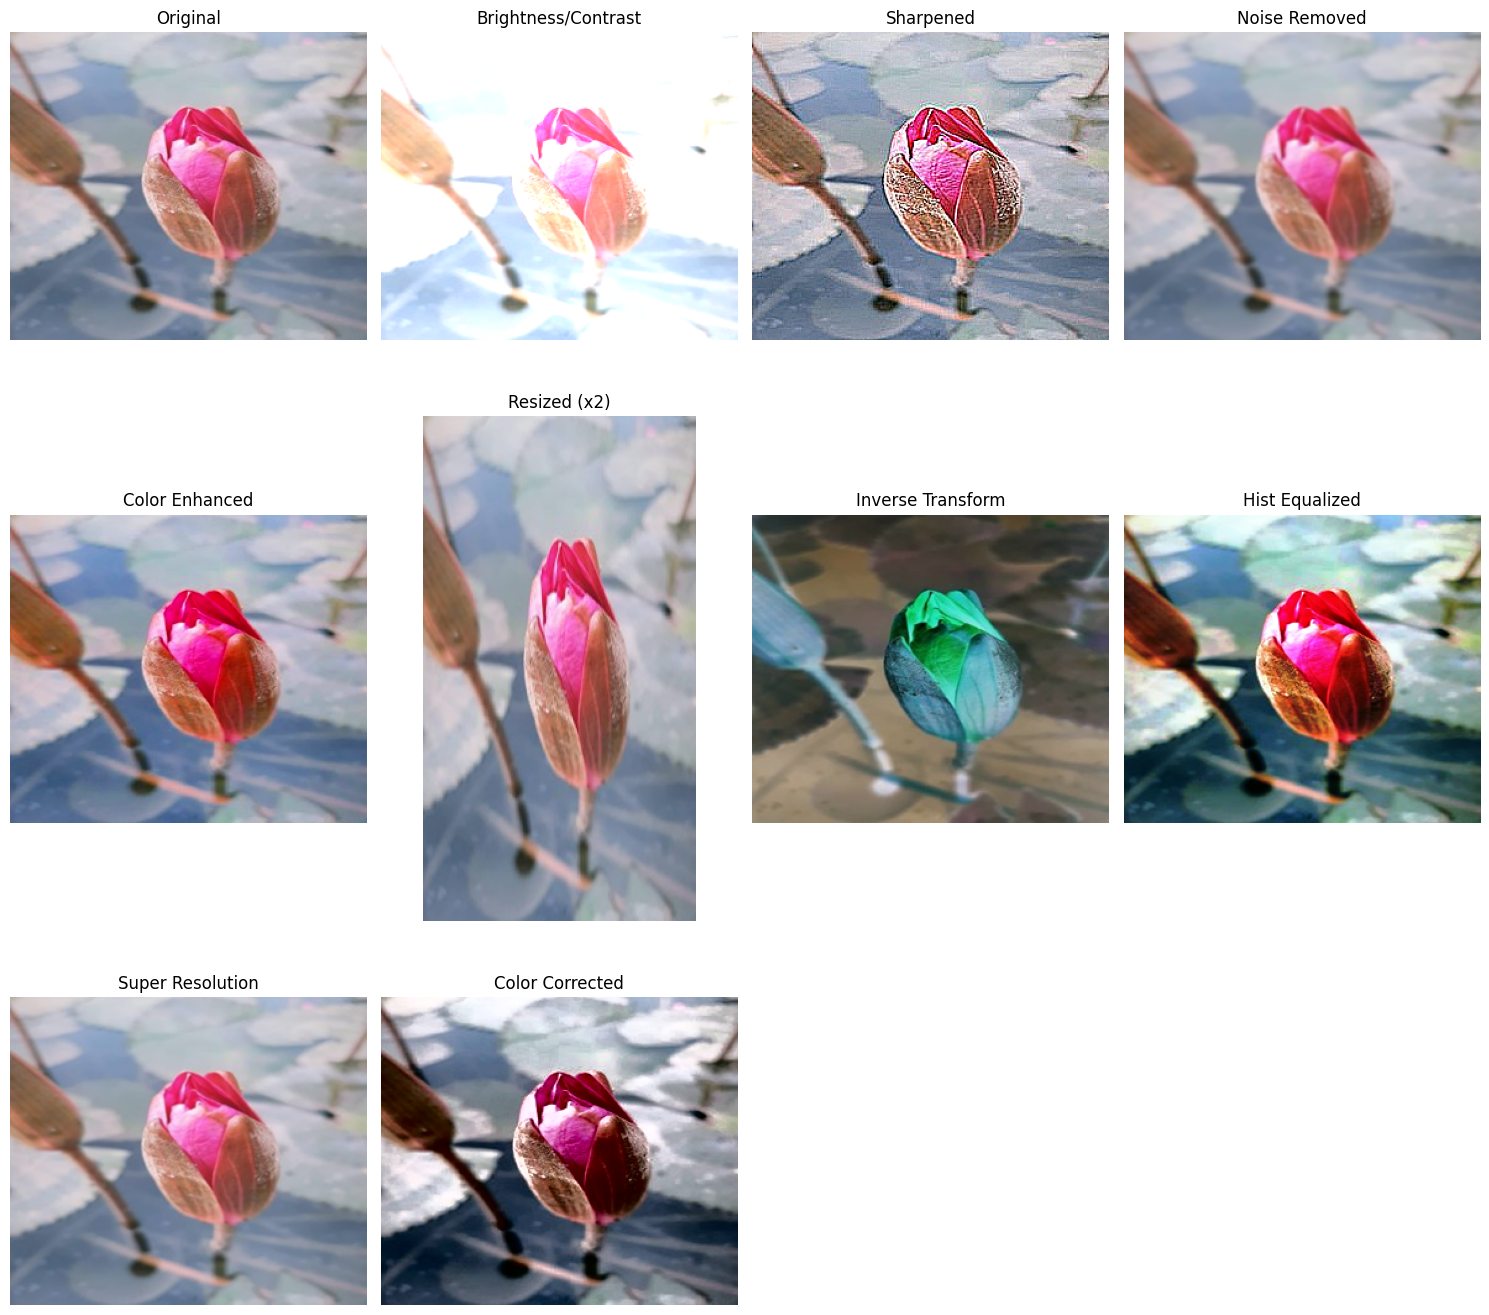

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageEnhancer:
    def __init__(self, image_path):
        """Initialize with image path and load the image."""
        self.image_path = image_path
        try:
            self.original_image = cv2.imread(self.image_path, cv2.IMREAD_COLOR)
            if self.original_image is None:
                raise FileNotFoundError(f"Could not load image at {self.image_path}")
        except Exception as e:
            print(f"Error loading image: {e}")
            raise

    def adjust_brightness_contrast(self, brightness=50, contrast=1.5):
        """Adjust brightness and contrast."""
        enhanced = cv2.convertScaleAbs(self.original_image, alpha=contrast, beta=brightness)
        return enhanced

    def sharpen_image(self):
        """Sharpen the image using a kernel."""
        kernel = np.array([[-1, -1, -1],
                          [-1,  9, -1],
                          [-1, -1, -1]])
        sharpened = cv2.filter2D(self.original_image, -1, kernel)
        return sharpened

    def remove_noise(self):
        """Remove noise using Gaussian blur."""
        denoised = cv2.GaussianBlur(self.original_image, (5, 5), 0)
        return denoised

    def enhance_color(self):
        """Enhance color by adjusting HSV saturation."""
        hsv = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        s = cv2.convertScaleAbs(s, alpha=1.5)
        enhanced_hsv = cv2.merge([h, s, v])
        enhanced = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)
        return enhanced

    def resize_image(self, scale_factor=2.0):
        """Resize image using INTER_CUBIC interpolation."""
        try:
            height, width = self.original_image.shape[:2]
            scale_x = 0.7
            scale_y = 1.5

            new_width = int(width * scale_x)
            new_height = int(height * scale_y)
            # new_height, new_width = int(height * scale_factor), int(width * scale_factor)
            resized = cv2.resize(self.original_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
            return resized
        except Exception as e:
            print(f"Error resizing image: {e}")
            return self.original_image

    def inverse_transform(self):
        """Invert colors by subtracting from 255."""
        inverted = 255 - self.original_image
        return inverted

    def equalize_histogram(self):
        """Equalize histogram for each channel."""
        b, g, r = cv2.split(self.original_image)
        b_eq = cv2.equalizeHist(b)
        g_eq = cv2.equalizeHist(g)
        r_eq = cv2.equalizeHist(r)
        equalized = cv2.merge([b_eq, g_eq, r_eq])
        return equalized

    def super_resolution(self):
        """Apply simple super-resolution using pyrUp."""
        upscaled = cv2.pyrUp(self.original_image)
        return upscaled

    def color_correction(self):
        """Perform basic color correction (white balance simulation)."""
        lab = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        l = cv2.equalizeHist(l)
        corrected_lab = cv2.merge([l, a, b])
        corrected = cv2.cvtColor(corrected_lab, cv2.COLOR_LAB2BGR)
        return corrected

    def visualize_all(self):
        """Visualize all enhancements in a grid layout."""
        # Create all enhanced images
        enhanced_images = {
            "Original": self.original_image,
            "Brightness/Contrast": self.adjust_brightness_contrast(),
            "Sharpened": self.sharpen_image(),
            "Noise Removed": self.remove_noise(),
            "Color Enhanced": self.enhance_color(),
            "Resized (x2)": self.resize_image(),
            "Inverse Transform": self.inverse_transform(),
            "Hist Equalized": self.equalize_histogram(),
            "Super Resolution": self.super_resolution(),
            "Color Corrected": self.color_correction()
        }

        # Create subplot grid
        plt.figure(figsize=(15, 15))
        for i, (title, img) in enumerate(enhanced_images.items(), 1):
            plt.subplot(3, 4, i)  # 3 rows, 4 columns
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(title)
            plt.axis('off')

        plt.tight_layout()
        plt.show()

def process_image(image_path):
    """Process the image with all enhancement techniques."""
    try:
        enhancer = ImageEnhancer(image_path)
        enhancer.visualize_all()
    except Exception as e:
        print(f"Error processing image: {e}")

def main():
    image_path = "flower.jpg"  # Change to your image path
    print(f"Processing {image_path}")
    process_image(image_path)

if __name__ == "__main__":
    main()

In [ ]:
#Part2

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
import time

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Data transforms & loading
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for AlexNet & VGG16
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = torchvision.datasets.CIFAR100(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.CIFAR100(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Step 2: Define training and evaluation functions
def train_model(model, criterion, optimizer, epochs=2):
    model.train()
    for epoch in range(epochs):
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss/len(train_loader):.4f} | Accuracy: {100*correct/total:.2f}%")

def evaluate_model(model):
    model.eval()
    correct, total = 0, 0
    start_time = time.time()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    end_time = time.time()
    acc = 100 * correct / total
    print(f"Test Accuracy: {acc:.2f}% | Inference Time: {end_time - start_time:.2f}s")
    return acc, end_time - start_time

# Step 3: Load and prepare AlexNet
from torchvision.models import AlexNet_Weights, VGG16_Weights

alexnet = models.alexnet(weights=AlexNet_Weights.DEFAULT)
alexnet.classifier[6] = nn.Linear(4096, 100)
alexnet = alexnet.to(device)

# Step 4: Load and prepare VGG16 (with frozen layers)
vgg16 = models.vgg16(weights=VGG16_Weights.DEFAULT)
for param in vgg16.features.parameters():
    param.requires_grad = False
vgg16.classifier[6] = nn.Linear(4096, 100)
vgg16 = vgg16.to(device)

# Step 5: Define loss and optimizers
criterion = nn.CrossEntropyLoss()
alexnet_optimizer = torch.optim.Adam(alexnet.parameters(), lr=0.0001)
vgg16_optimizer = torch.optim.Adam(vgg16.classifier.parameters(), lr=0.0005)  # only classifier trains

# Step 6: Train both models
print("\nTraining AlexNet...")
train_model(alexnet, criterion, alexnet_optimizer, epochs=2)




Training AlexNet...
Epoch 1/2 | Loss: 1.8956 | Accuracy: 48.68%
Epoch 2/2 | Loss: 1.1309 | Accuracy: 66.56%


In [ ]:
print("\nTraining VGG16 (features frozen)...")
train_model(vgg16, criterion, vgg16_optimizer, epochs=2)

# Step 7: Evaluate both models
print("\nEvaluating AlexNet...")
alex_acc, alex_time = evaluate_model(alexnet)

print("\nEvaluating VGG16...")
vgg_acc, vgg_time = evaluate_model(vgg16)

# Step 8: Final comparison
print("\n--- Final Comparison ---")
print(f"AlexNet -> Accuracy: {alex_acc:.2f}% | Inference Time: {alex_time:.2f}s")
print(f"VGG16   -> Accuracy: {vgg_acc:.2f}% | Inference Time: {vgg_time:.2f}s")



Training VGG16 (features frozen)...
Epoch 1/2 | Loss: 2.4413 | Accuracy: 36.91%
Epoch 2/2 | Loss: 1.8282 | Accuracy: 51.56%

Evaluating AlexNet...
Test Accuracy: 65.44% | Inference Time: 18.97s

Evaluating VGG16...
Test Accuracy: 56.14% | Inference Time: 65.25s

--- Final Comparison ---
AlexNet -> Accuracy: 65.44% | Inference Time: 18.97s
VGG16   -> Accuracy: 56.14% | Inference Time: 65.25s


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
import time

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Data transforms & loading
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for AlexNet & VGG16
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = torchvision.datasets.CIFAR100(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.CIFAR100(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Step 2: Define training and evaluation functions
def train_model(model, criterion, optimizer, epochs=2):
    model.train()
    for epoch in range(epochs):
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss/len(train_loader):.4f} | Accuracy: {100*correct/total:.2f}%")

def evaluate_model(model):
    model.eval()
    correct, total = 0, 0
    start_time = time.time()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    end_time = time.time()
    acc = 100 * correct / total
    print(f"Test Accuracy: {acc:.2f}% | Inference Time: {end_time - start_time:.2f}s")
    return acc, end_time - start_time

# Step 3: Load and prepare AlexNet
from torchvision.models import AlexNet_Weights, VGG16_Weights

alexnet = models.alexnet(weights=AlexNet_Weights.DEFAULT)
alexnet.classifier[6] = nn.Linear(4096, 100)
alexnet = alexnet.to(device)

# Step 4: Load and prepare VGG16 (with frozen layers)
vgg16 = models.vgg16(weights=VGG16_Weights.DEFAULT)
for param in vgg16.features.parameters():
    param.requires_grad = False
vgg16.classifier[6] = nn.Linear(4096, 100)
vgg16 = vgg16.to(device)

# Step 5: Define loss and optimizers
criterion = nn.CrossEntropyLoss()
alexnet_optimizer = torch.optim.Adam(alexnet.parameters(), lr=0.0001)
vgg16_optimizer = torch.optim.Adam(vgg16.classifier.parameters(), lr=0.0005)  # only classifier trains

# Step 6: Train both models
print("\nTraining AlexNet...")
train_model(alexnet, criterion, alexnet_optimizer, epochs=10)



100%|██████████| 169M/169M [00:13<00:00, 12.3MB/s]
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 178MB/s]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 89.1MB/s]



Training AlexNet...
Epoch 1/10 | Loss: 1.8933 | Accuracy: 48.74%
Epoch 2/10 | Loss: 1.1347 | Accuracy: 66.47%
Epoch 3/10 | Loss: 0.8349 | Accuracy: 74.54%
Epoch 4/10 | Loss: 0.6168 | Accuracy: 80.70%
Epoch 5/10 | Loss: 0.4610 | Accuracy: 85.20%
Epoch 6/10 | Loss: 0.3525 | Accuracy: 88.25%
Epoch 7/10 | Loss: 0.2846 | Accuracy: 90.68%
Epoch 8/10 | Loss: 0.2477 | Accuracy: 91.84%
Epoch 9/10 | Loss: 0.2125 | Accuracy: 93.05%
Epoch 10/10 | Loss: 0.1928 | Accuracy: 93.64%


In [ ]:
print("\nTraining VGG16 (features frozen)...")
train_model(vgg16, criterion, vgg16_optimizer, epochs=10)

# Step 7: Evaluate both models
print("\nEvaluating AlexNet...")
alex_acc, alex_time = evaluate_model(alexnet)

print("\nEvaluating VGG16...")
vgg_acc, vgg_time = evaluate_model(vgg16)

# Step 8: Final comparison
print("\n--- Final Comparison ---")
print(f"AlexNet -> Accuracy: {alex_acc:.2f}% | Inference Time: {alex_time:.2f}s")
print(f"VGG16   -> Accuracy: {vgg_acc:.2f}% | Inference Time: {vgg_time:.2f}s")



Training VGG16 (features frozen)...
Epoch 1/10 | Loss: 2.4462 | Accuracy: 36.57%
Epoch 2/10 | Loss: 1.8151 | Accuracy: 51.79%
Epoch 3/10 | Loss: 1.5412 | Accuracy: 59.09%
Epoch 4/10 | Loss: 1.3800 | Accuracy: 63.39%
Epoch 5/10 | Loss: 1.2635 | Accuracy: 66.88%
Epoch 6/10 | Loss: 1.1901 | Accuracy: 69.72%
Epoch 7/10 | Loss: 1.1248 | Accuracy: 71.74%
Epoch 8/10 | Loss: 1.0955 | Accuracy: 73.26%
Epoch 9/10 | Loss: 1.0364 | Accuracy: 75.11%
Epoch 10/10 | Loss: 1.0239 | Accuracy: 76.19%

Evaluating AlexNet...
Test Accuracy: 68.54% | Inference Time: 18.73s

Evaluating VGG16...
Test Accuracy: 59.23% | Inference Time: 64.79s

--- Final Comparison ---
AlexNet -> Accuracy: 68.54% | Inference Time: 18.73s
VGG16   -> Accuracy: 59.23% | Inference Time: 64.79s
